In [8]:
import os.path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

pkgdir = '.\data'


In [9]:
# COVID - Leitura dos dados
covid = pd.read_csv(f'{pkgdir}\covid_cidades.csv', index_col='date', parse_dates=True)
covid.head()

,state,city,confirmed,deaths,estimated_population_2019,confirmed_per_100k_inhabitants,death_rate
date,,,,,,,
2020-12-29,AP,Amapá,956,6,9109.0,10406.00849,0.0063
2020-12-29,AP,Calçoene,1436,7,11117.0,12701.22059,0.0049
2020-12-29,AP,Cutias,741,2,5983.0,12145.54991,0.0027
2020-12-29,AP,Ferreira Gomes,930,5,7780.0,11673.15175,0.0054
2020-12-29,AP,Itaubal,345,0,5503.0,6142.06872,0.0000


In [11]:
len(covid)

5536

In [13]:
# agrupando os dados por estado
somas = covid.groupby("state",as_index = False).sum()
somas

,state,confirmed,deaths,estimated_population_2019,confirmed_per_100k_inhabitants,death_rate
0,AC,41232,791,881935.0,1.011945e+05,0.3353
1,AL,104119,2475,3337357.0,2.508014e+05,3.6834
2,AM,198201,5232,4144597.0,4.021734e+05,0.9667
3,AP,67405,913,845731.0,1.740958e+05,0.1133
4,BA,487691,9072,14873064.0,1.150643e+06,6.6745
5,CE,330986,9971,9132078.0,6.566612e+05,4.6634
6,DF,250457,4241,3015268.0,7.181417e+03,0.0291
7,ES,244251,5031,4018650.0,4.307890e+05,1.6198
8,GO,307686,6789,7018354.0,8.240545e+05,5.6447
9,MA,200564,4488,7075181.0,6.306338e+05,4.3175


In [15]:
somas = somas.sort_values(by='deaths', ascending=False)
somas

,state,confirmed,deaths,estimated_population_2019,confirmed_per_100k_inhabitants,death_rate
24,SP,1440229,46195,45919049.0,1.708738e+06,16.8979
18,RJ,426259,25078,17264943.0,2.878304e+05,3.2501
10,MG,529653,11615,21168791.0,1.612620e+06,20.2186
5,CE,330986,9971,9132078.0,6.566612e+05,4.6634
15,PE,217772,9612,9557071.0,3.702344e+05,7.6460
4,BA,487691,9072,14873064.0,1.150643e+06,6.6745
21,RS,438458,8680,11377239.0,1.600758e+06,10.3128
17,PR,408731,7810,11433957.0,1.074915e+06,7.5628
13,PA,292712,7169,8602865.0,4.822244e+05,3.7332
8,GO,307686,6789,7018354.0,8.240545e+05,5.6447


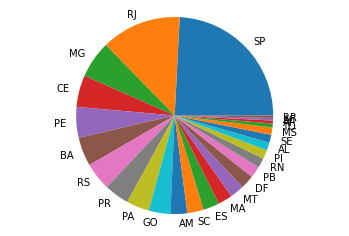

In [18]:
# Gráfico de setores (gráfico de pizza)
labels = somas['state'].values
sizes = somas['deaths'].values

plt.pie(sizes, labels=labels)

plt.axis('equal') #faz o gráfico circular
plt.show()

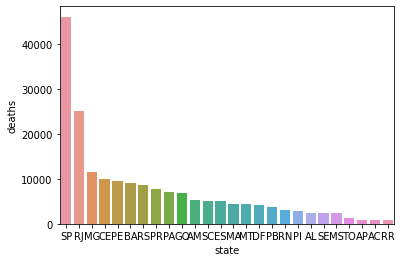

In [20]:
import seaborn as sns
ax = sns.barplot(x="state", y="deaths", data=somas)

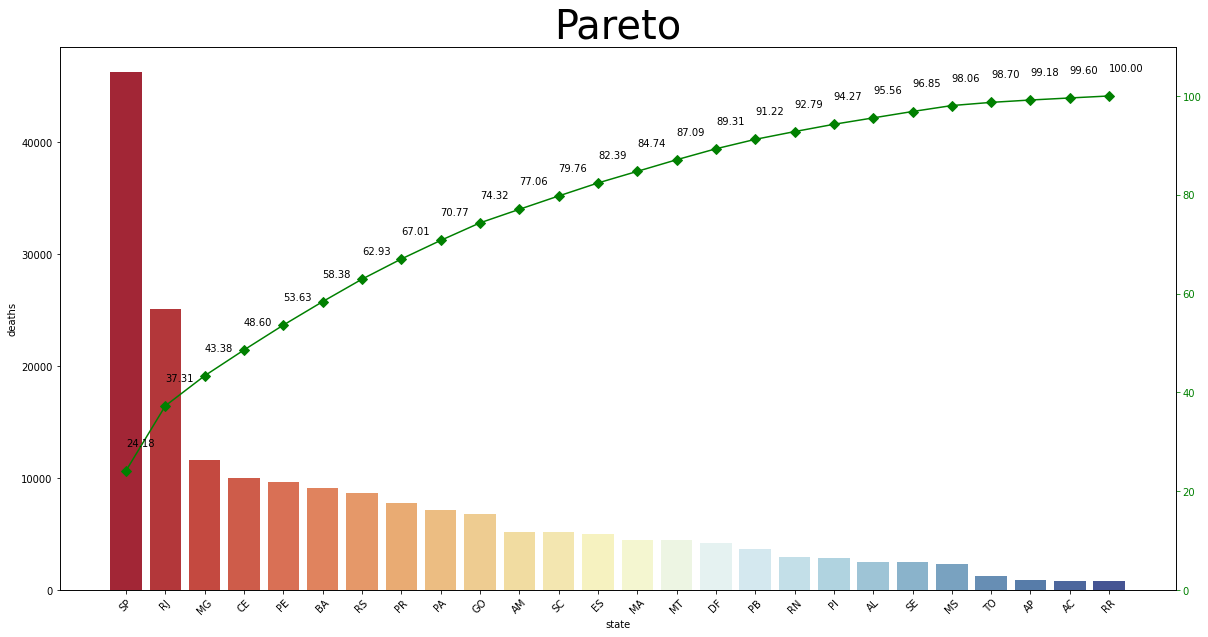

In [23]:
# Fonte: https://www.vstram.com.br/blog/grafico-pareto-python-six-sigma/

import seaborn as sns

# Cria a barplot, define os eixos e a paleta de cores usada para colorir as barras
plt.figure(figsize=(20,10))
ax = sns.barplot(x=somas["state"], y=somas["deaths"], palette="RdYlBu")
ax.set_title("Pareto", fontsize=40) # define e ajusta o tamanho da fonte do título

somas["Percent"] = somas["deaths"]/somas["deaths"].sum() * 100
somas['CumPercent'] = somas["Percent"].cumsum()

# Eixo secundário
ax2 = ax.twinx()

# Cria a Curva de Pareto no eixo secundário
ax2.plot(somas["state"], somas["CumPercent"], color="g", marker="D", ms=7, label='Pareto')

# Configurações dos eixos 
ax2.tick_params(axis="y", colors="g")
ax2.set_ylim([0,110])

# Ajusta a inclinação dos labels do eixo x
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

# Mostra os labels com a percentagem acumulada em cada ponto
gap = 5
for i in range(len(somas["CumPercent"])):
    ax2.annotate("%.2f" % somas["CumPercent"][i], (somas["state"][i], somas["CumPercent"][i] + gap))
